# Insurance Claim Fraud Detection Project

Problem Statement :-

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 


# Importing the Libraries & Dataset:-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

# Importing the required libraries to perform EDA

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df

# Importing the Dataset into Python from the System

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
fraud=pd.DataFrame(data=df)
fraud

# Giving the Dataset a Structured format with the Dataframe function and assigning the name "fraud"

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# EDA (Exploratory Data Analysis):-

In [4]:
fraud.columns

# The names of all columns that are present in Churn Dataset

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
# Check Shape of Dataset
fraud.shape

# Displaying rows and columns of dataset

(1000, 40)

In fraud dataset we can see 1000  rows and 40 columns.

In [6]:
# Check duplicate values
fraud.duplicated().any()

False

Dataset do not have duplicate values.

In [7]:
fraud.info()

# Displaying all the columns Data Type and Null Values present in them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
fraud.isnull().sum()

# As we can see that there are no missing values present in the Dataset 

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<AxesSubplot:>

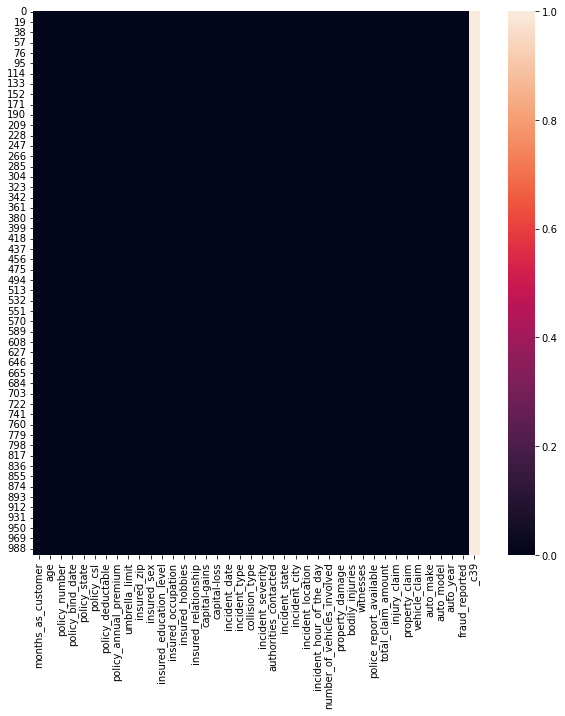

In [9]:
# Checking null values using graph
plt.figure(figsize=(10,10))
sns.heatmap(fraud.isnull())

In [10]:
fraud.drop(['_c39'],axis=1,inplace=True)

# _C39 feature contaains zero values so there is no need of this column. We will drop it .

In [11]:
fraud["policy_state"].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

In [12]:
# Check unique values 
fraud.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

# Univariate Analysis:

<AxesSubplot:xlabel='policy_state', ylabel='count'>

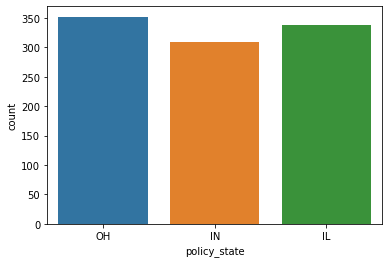

In [13]:
sns.countplot(fraud["policy_state"])

# Graphical representation of policy state in dataset

The 3 States of United States are present in the Dataset naming Ohio(OH), Indiana(IN) & Illinois(IL)

In [14]:
fraud["policy_csl"].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

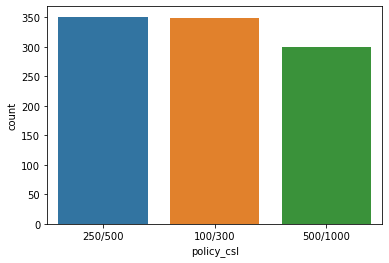

In [15]:
sns.countplot(fraud["policy_csl"])

# Graphical representation of policy_csl in dataset

There are 3 types of CSL (Combined Single Limit) policies in the Dataset

In [16]:
fraud["insured_sex"].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

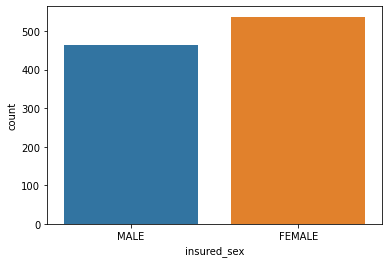

In [17]:
sns.countplot(fraud["insured_sex"])

# Graphical representation of insured_sex in dataset

There are more Female insured persons in this Dataset than males

In [18]:
fraud["insured_education_level"].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

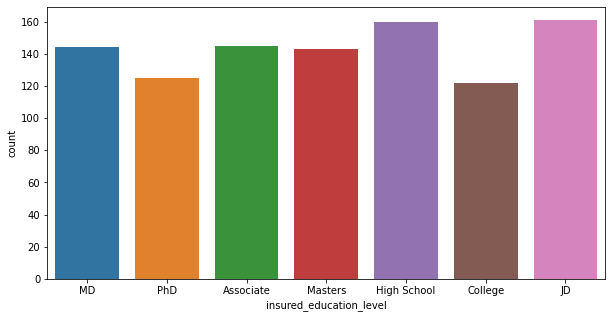

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(fraud["insured_education_level"])

# Graphical representation of insured_education_level in dataset

It shows the different Education levels of Insured Persons

In [20]:
fraud["insured_hobbies"].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

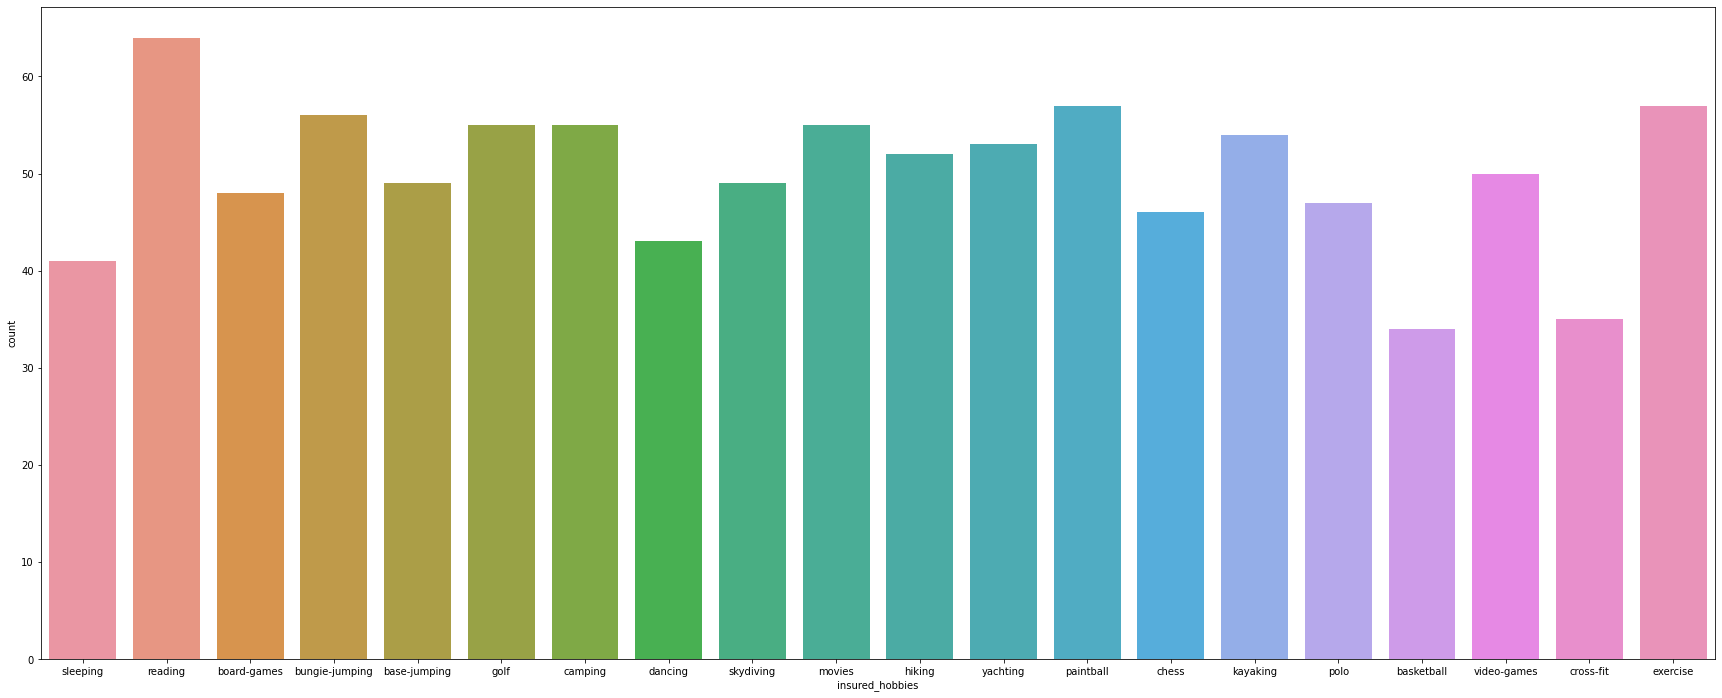

In [21]:
plt.figure(figsize=(30,12))
sns.countplot(fraud["insured_hobbies"])

# Graphical representation of insured_hobbies in dataset

Graph shows that Reading & Exercise are the most common Hobbies among the insured persons

In [22]:
fraud["insured_occupation"].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

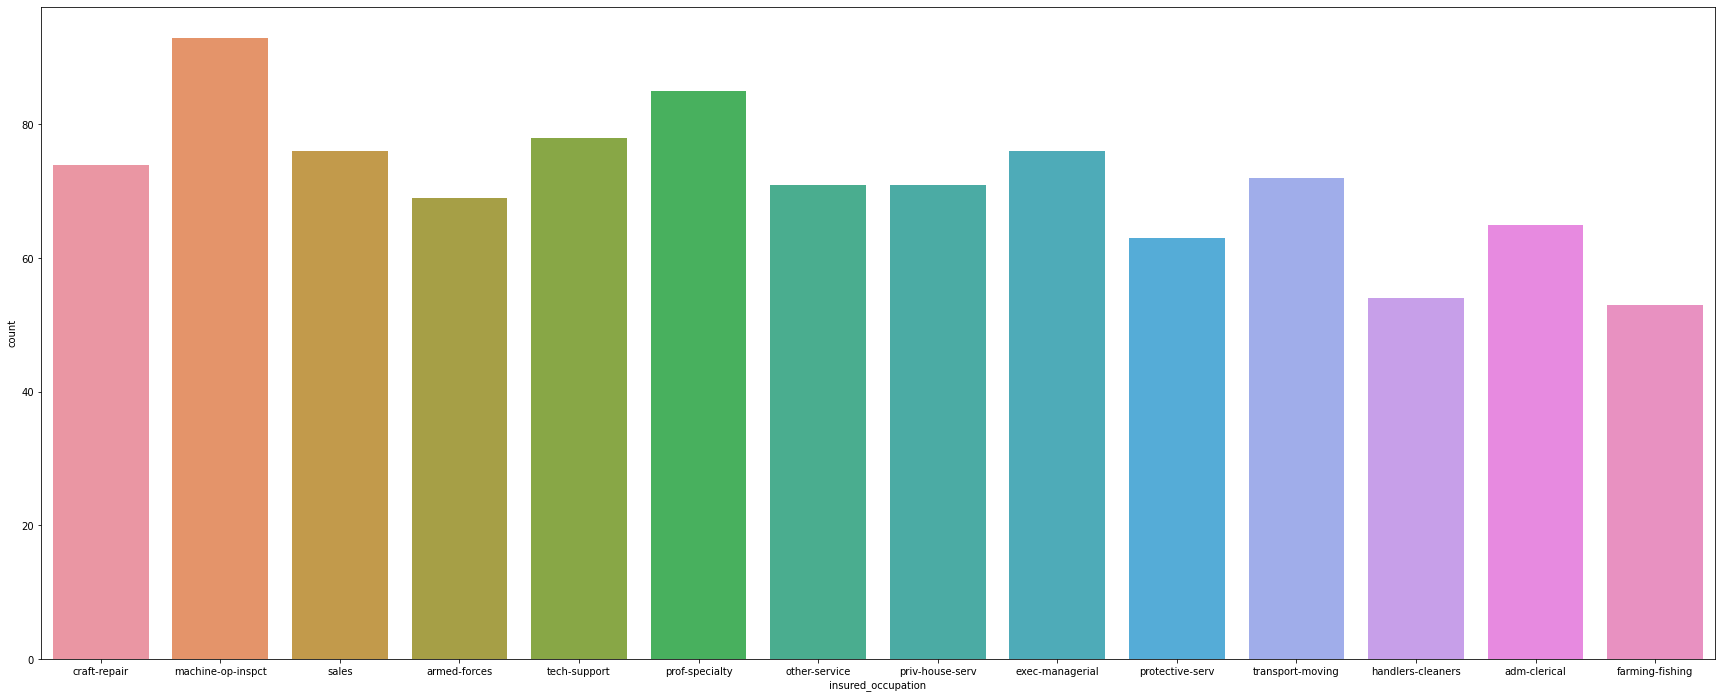

In [23]:
plt.figure(figsize=(30,12))
sns.countplot(fraud["insured_occupation"])

# Graphical representation of insured_occupation in dataset

The Graph shows that mostly insured persons are from Machine Operations Occupation and it requires a compulsory insurance as it is dangerous job to work at machines

In [24]:
fraud["insured_relationship"].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

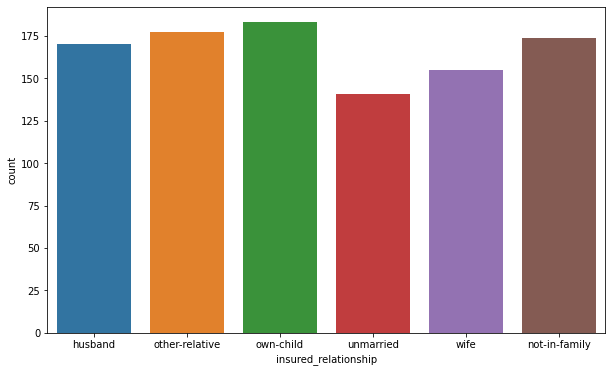

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(fraud["insured_relationship"])

# Graphical representation of insured_relationship in dataset

Graph showing the relationship of the insured person in the family

In [26]:
fraud["incident_type"].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

<AxesSubplot:xlabel='incident_type', ylabel='count'>

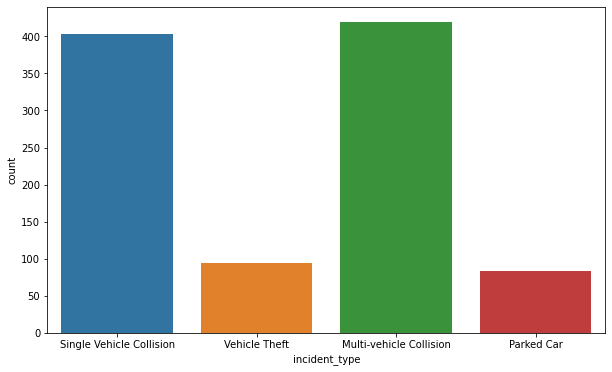

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(fraud["incident_type"])

# Graphical representation of incident_type in dataset

The Graph shows 4 kinds of incidents under which insured persons have raised a claim in this Dataset

In [28]:
fraud["incident_state"].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

<AxesSubplot:xlabel='incident_state', ylabel='count'>

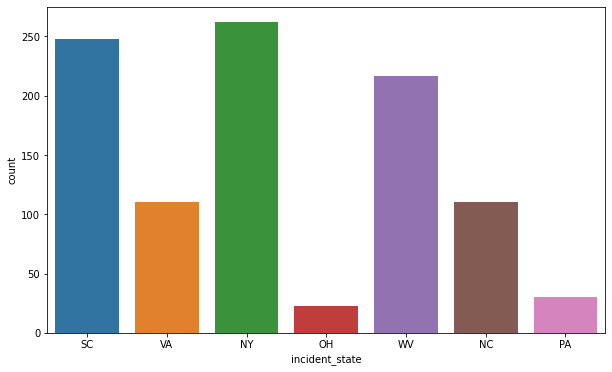

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(fraud["incident_state"])

# Graphical representation of incident_state in dataset

The Graph shows the different states of United States in which the incidents took place

In [30]:
fraud["incident_city"].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

<AxesSubplot:xlabel='incident_city', ylabel='count'>

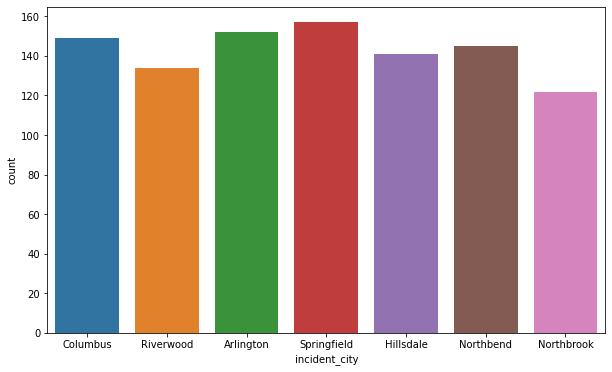

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(fraud["incident_city"])

# Graphical representation of incident_city in dataset

The Graph shows the different cities of United States in which the incidents took place

In [32]:
fraud["incident_severity"].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

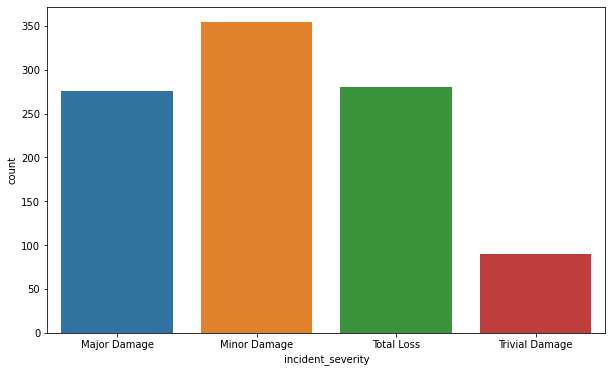

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(fraud["incident_severity"])

# Graphical representation of incident_severity in dataset

The Graph shows that there are most cases of minor damage and total loss in the dataset

In [34]:
fraud["authorities_contacted"].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

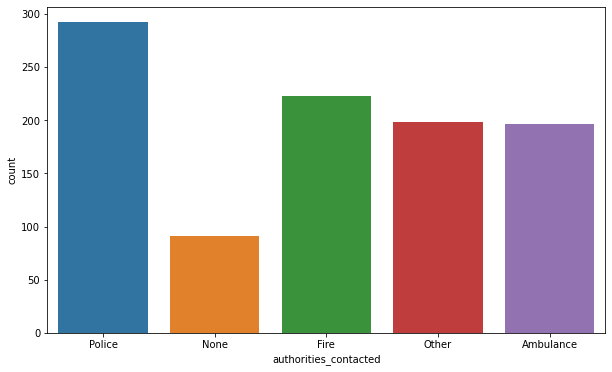

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(fraud["authorities_contacted"])

# Graphical representation of authorities_contacted in dataset

The Graph shows that Police was the most prior authority people contacted after the incidents.while Fire authorities were second in place when it comes to authorities contacted

In [36]:
fraud["property_damage"].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

<AxesSubplot:xlabel='property_damage', ylabel='count'>

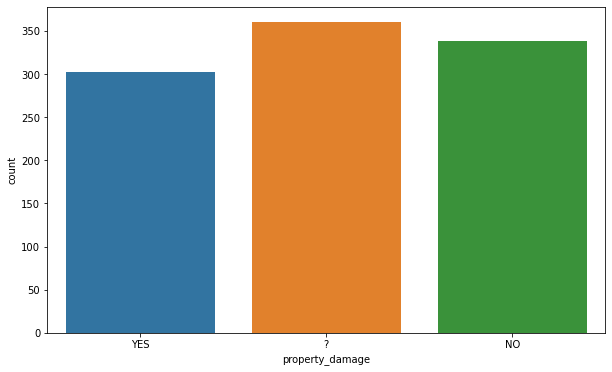

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(fraud["property_damage"])

# Graphical representation of property_damage in dataset

The Graph shows that there are missing values present in this column marked with "?".Most claims are not related to property damage

In [38]:
fraud["police_report_available"].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

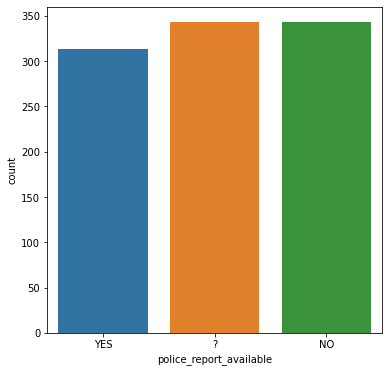

In [39]:
plt.figure(figsize=(6,6))
sns.countplot(fraud["police_report_available"])

# Graphical representation of police_report_available in dataset

The Graph shows that there are missing values present in this column marked with "?".Most claims do not have police reports available

In [40]:
fraud["auto_make"].value_counts()

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

<AxesSubplot:xlabel='auto_make', ylabel='count'>

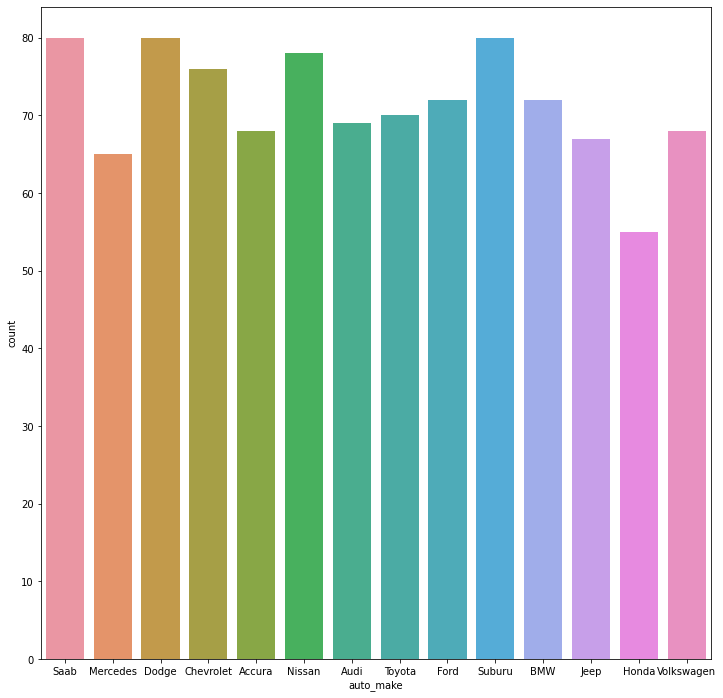

In [41]:
plt.figure(figsize=(12,12))
sns.countplot(fraud["auto_make"])

# Graphical representation of auto_make in dataset

This Graph shows that most car makes data are of Dodge, Suburu & Saab while the least car make data is of Honda

In [42]:
fraud["auto_model"].value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

<AxesSubplot:xlabel='auto_model', ylabel='count'>

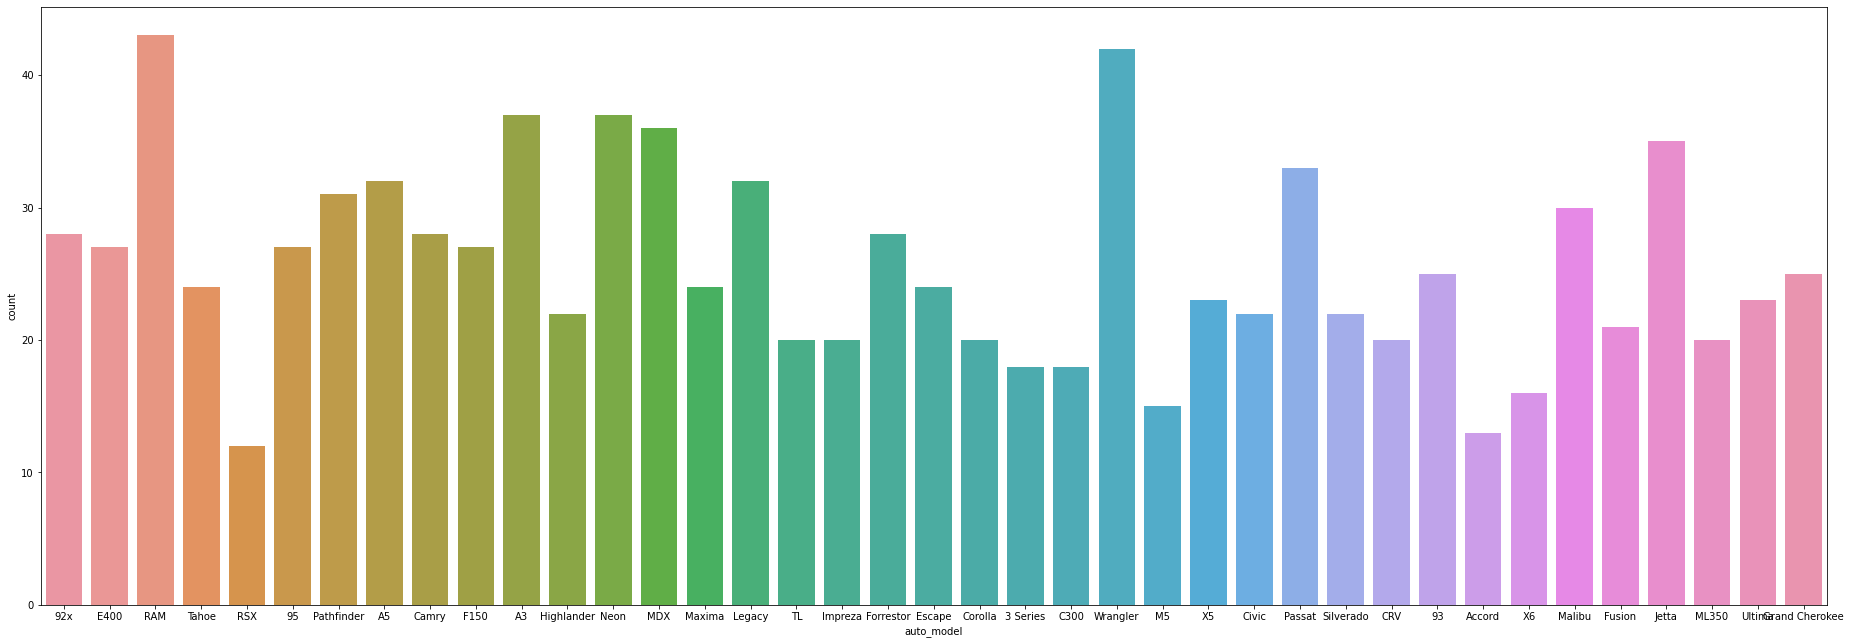

In [43]:
plt.figure(figsize=(32,11))
sns.countplot(fraud["auto_model"])

# Graphical representation of auto_model in dataset

The graph shows that Most Car models in dataset are RAM & Wrangler

In [44]:
fraud["fraud_reported"].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

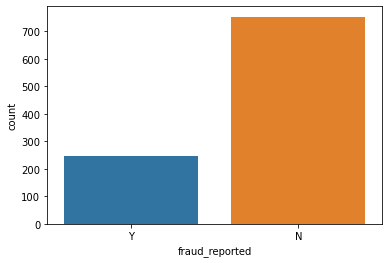

In [45]:
sns.countplot(fraud["fraud_reported"])
              
# Graphical representation of fraud_reported in dataset              

The Graph shows that out of 1000 data there are 250 Frauds found means that there are 25% fraudulent claims in Dataset it means dataset is imbalance

<AxesSubplot:xlabel='auto_make', ylabel='count'>

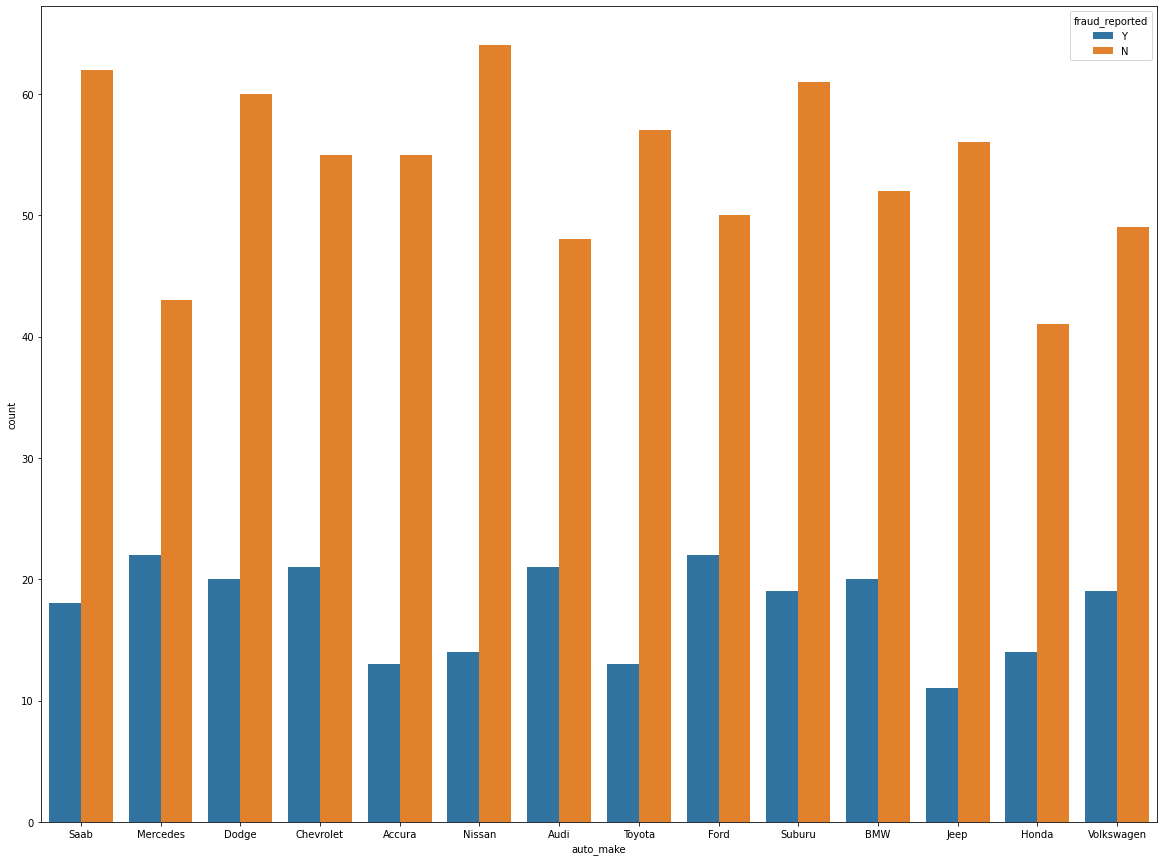

In [46]:
plt.figure(figsize=(20,15))
sns.countplot(fraud["auto_make"],hue=fraud["fraud_reported"])

# Graph shows that most frauds are related to car makes of Ford, Mercedes & BMW

<AxesSubplot:xlabel='count', ylabel='auto_model'>

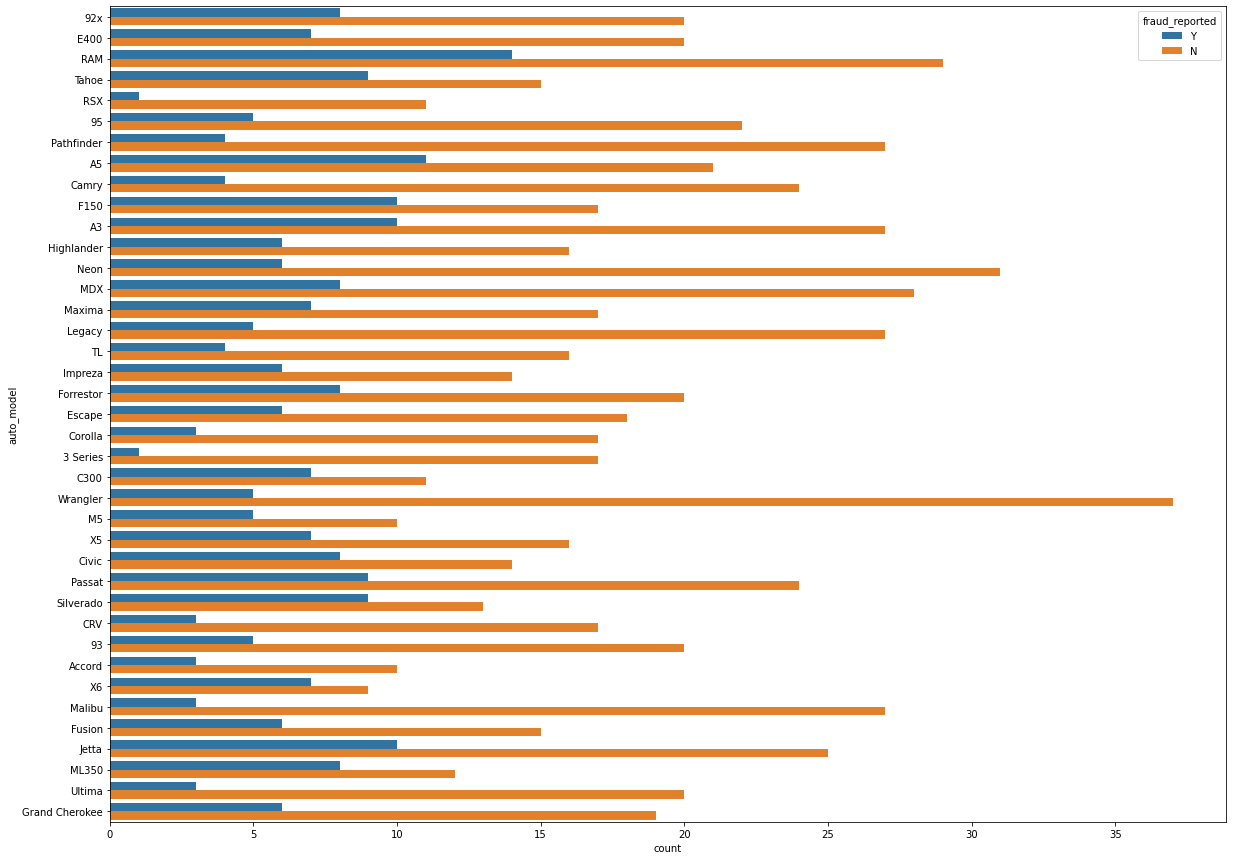

In [47]:
plt.figure(figsize=(20,15))
sns.countplot(y=fraud["auto_model"],hue=fraud["fraud_reported"])

# The graph shows that most frauds are related to RAM, A5 & Jetta car models

<AxesSubplot:xlabel='count', ylabel='insured_occupation'>

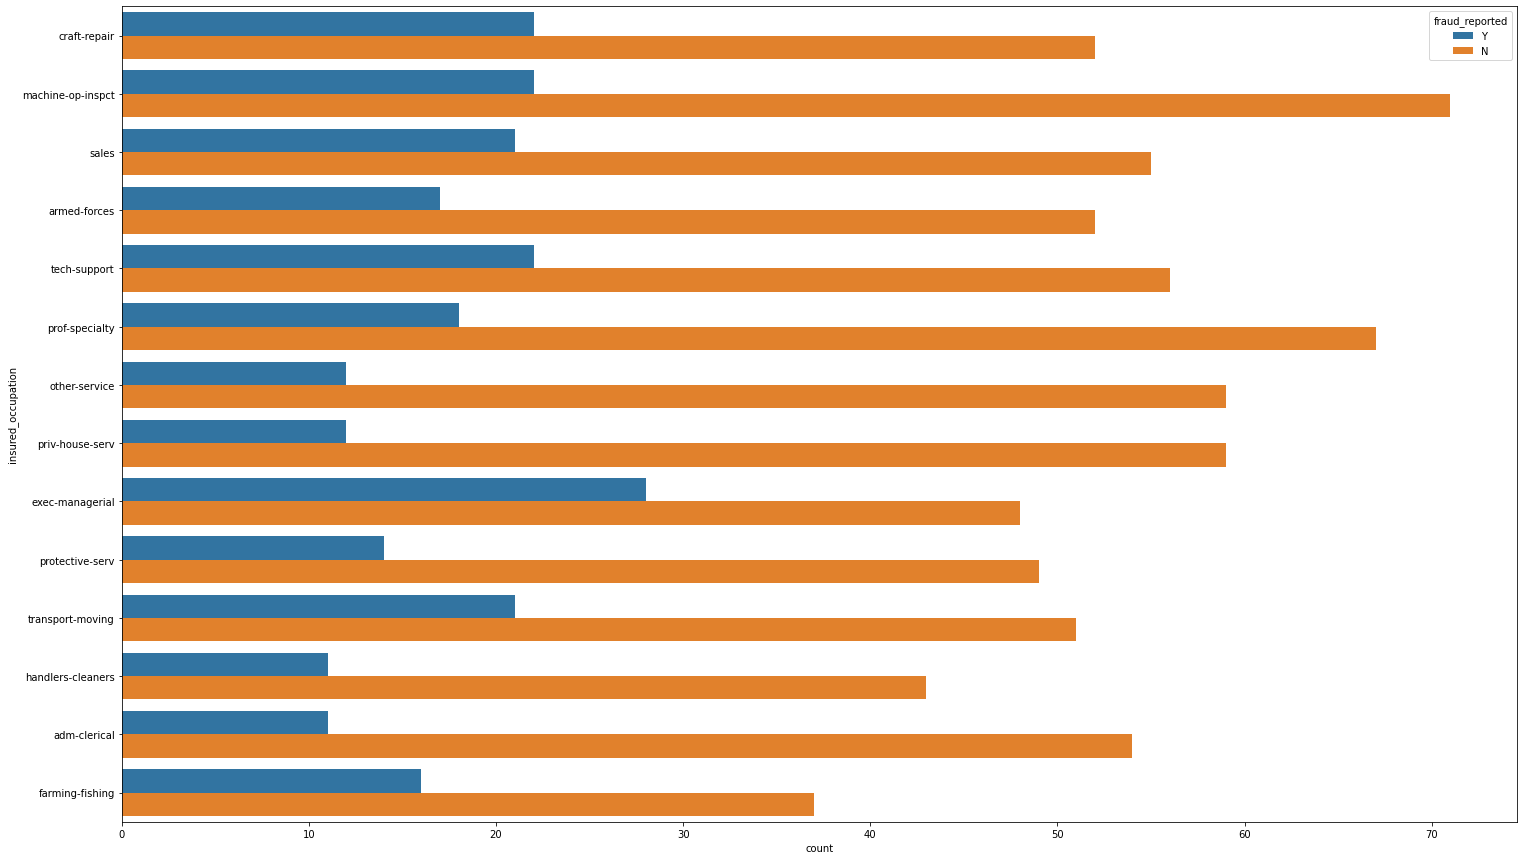

In [48]:
plt.figure(figsize=(25,15))
sns.countplot(y=fraud["insured_occupation"],hue=fraud["fraud_reported"])

# The Graph shows that most fraud claims are from people working on occupation as Executive Managers 
# The least fraud claims are from other occupations

<AxesSubplot:xlabel='count', ylabel='insured_hobbies'>

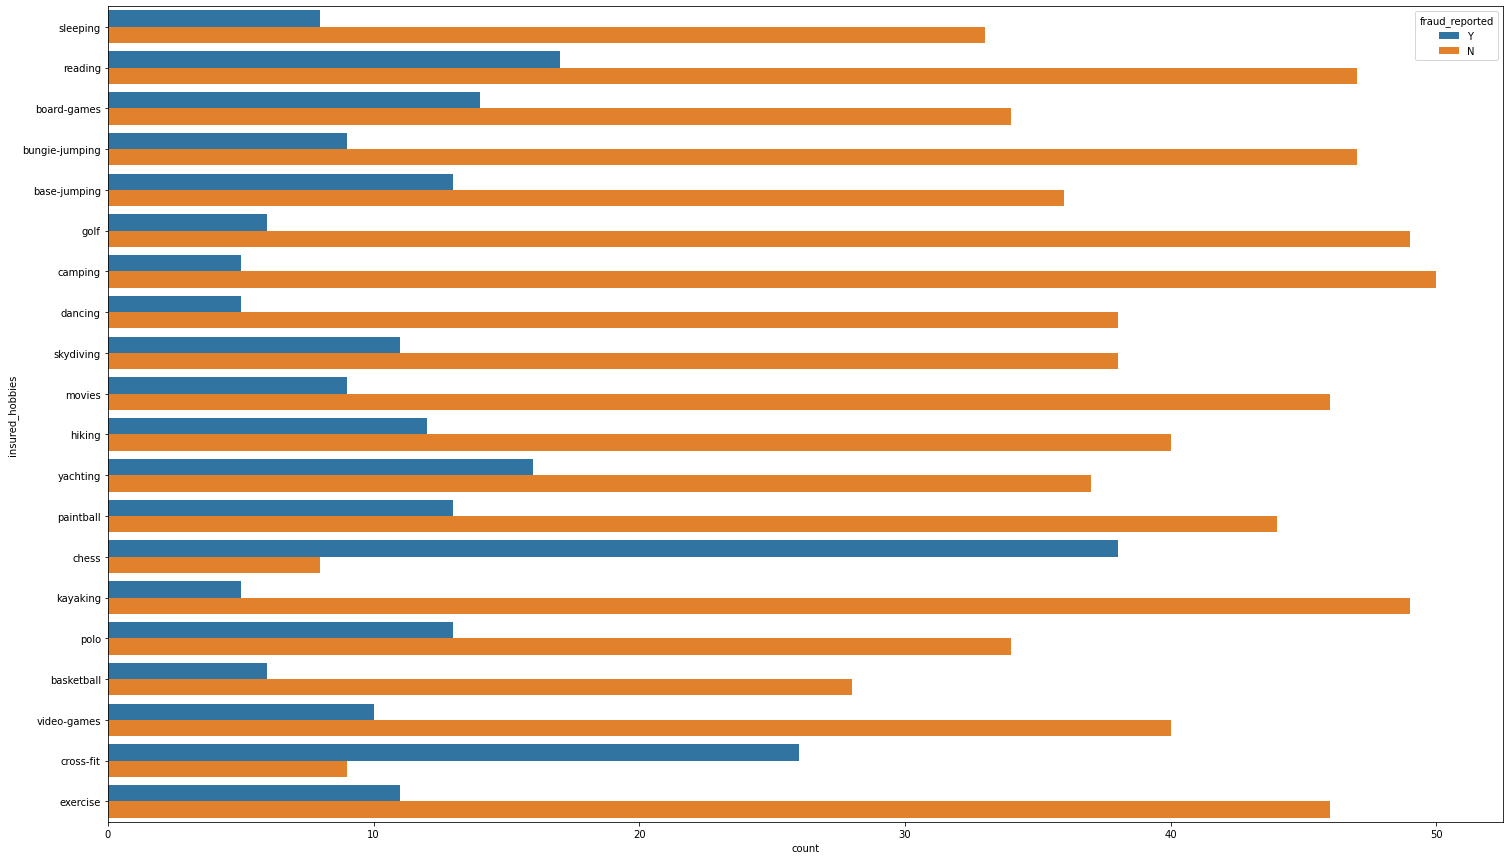

In [49]:
plt.figure(figsize=(25,15))
sns.countplot(y=fraud["insured_hobbies"],hue=fraud["fraud_reported"])

# The Graph shows that most of the fraud claims come from people having hobbies as Chess & Cross Fit
# Both the hobbies require mind and planning which are also the skills that are required to do fraudulent activities

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

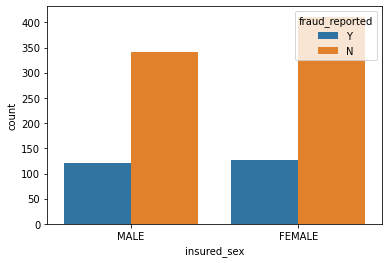

In [50]:
sns.countplot(fraud["insured_sex"],hue=fraud["fraud_reported"])

# The Graph shows almost equal number of fraudulent claims from male and female insured persons

<AxesSubplot:xlabel='policy_state', ylabel='count'>

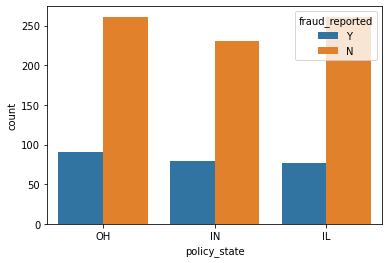

In [51]:
sns.countplot(fraud["policy_state"],hue=fraud["fraud_reported"])

# The Graph shows that more number of Fraud claims come from OH and almost equal number of fraud claims from IN & IL states

<AxesSubplot:xlabel='fraud_reported', ylabel='total_claim_amount'>

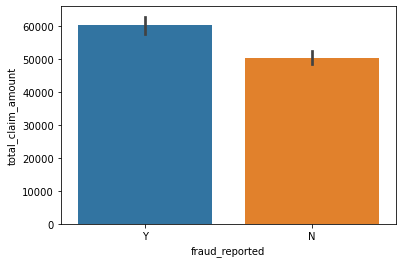

In [52]:
sns.barplot(x=fraud["fraud_reported"],y=fraud["total_claim_amount"])

# The Graph shows that total claim amounts are very high in case of fraudulent claims

# Some of the features contains class "?", which can be treates as nan value. So first of all replace "?" with nan value.

In [53]:
fraud.replace("?",np.NaN,inplace=True)

# Replacing the ? in different columns of the Dataset with Missing values as ? indicates missing values

In [54]:
fraud.isnull().sum()

# Checking null Values in Dataset 

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

As we can see there are ? or missing values present in 3 columns of the Dataset ie: 

Collision_type :- 178

Property_damage :-360

police_report_available :-343


In [55]:
fraud['collision_type']=fraud['collision_type'].fillna(fraud['collision_type'].mode()[0])
fraud['property_damage']=fraud['property_damage'].fillna(fraud['property_damage'].mode()[0])
fraud['police_report_available']=fraud['police_report_available'].fillna(fraud['police_report_available'].mode()[0])

# Filling the Missing Values in the Dataset

In [56]:
fraud

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


# Bi-variate Analysis:

<AxesSubplot:xlabel='months_as_customer', ylabel='age'>

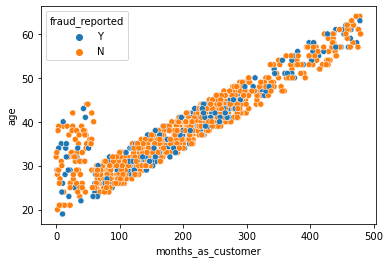

In [57]:
sns.scatterplot(x=fraud['months_as_customer'],y=fraud['age'],hue=fraud['fraud_reported'])

<AxesSubplot:xlabel='total_claim_amount', ylabel='property_claim'>

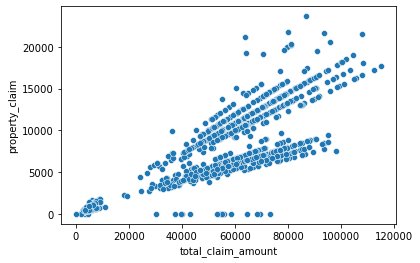

In [58]:
sns.scatterplot(x=fraud['total_claim_amount'],y=fraud['property_claim'])

# Descriptive Analysis :-

In [59]:
# Now checking  features description.
fraud.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


Key Observations :-
    
All features are having difference in mean and median except bodily_injuries and auto_year which means that skewness is present in the data.

High difference in 75th percentile and 100th percentile shows presence of outliers.

While some feataures are also haivng high diffenence in 0 percentile and 25th percentile

# Checking Distribution of Dataset :-

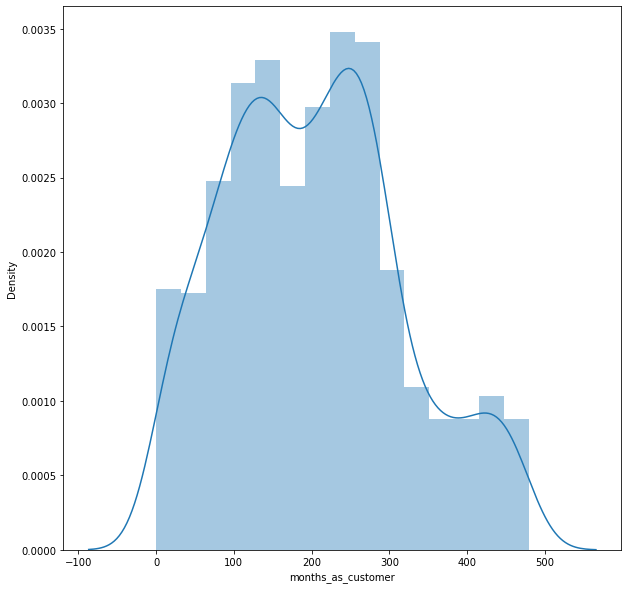

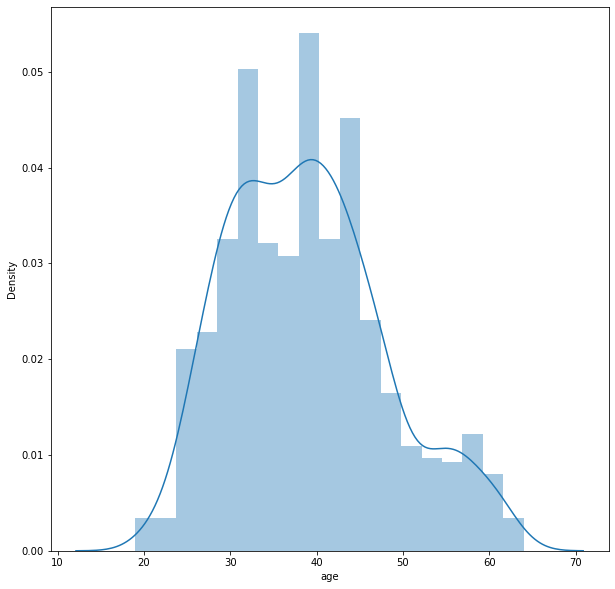

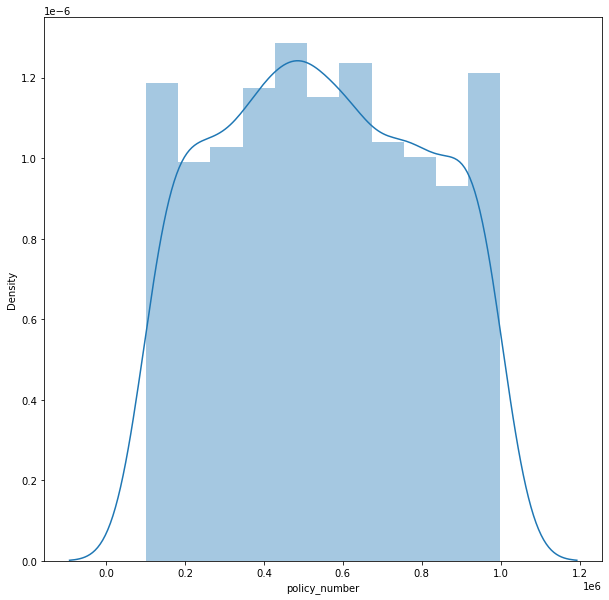

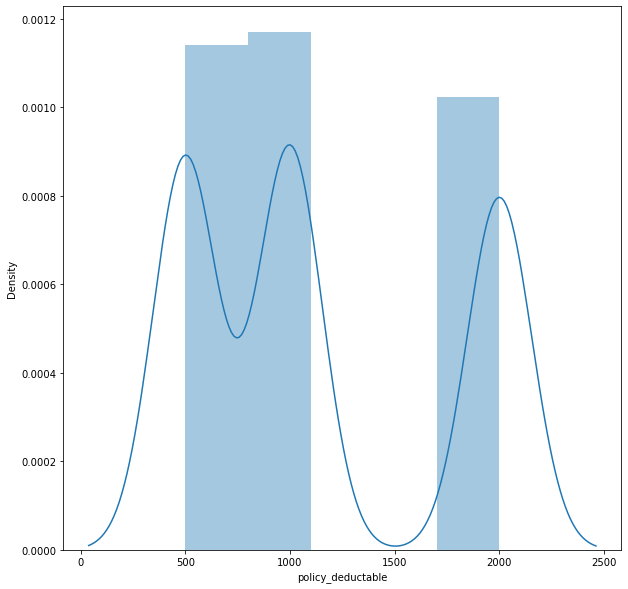

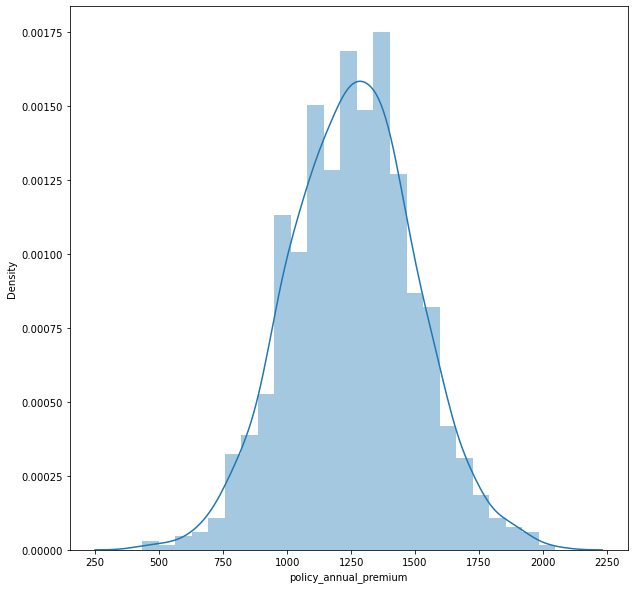

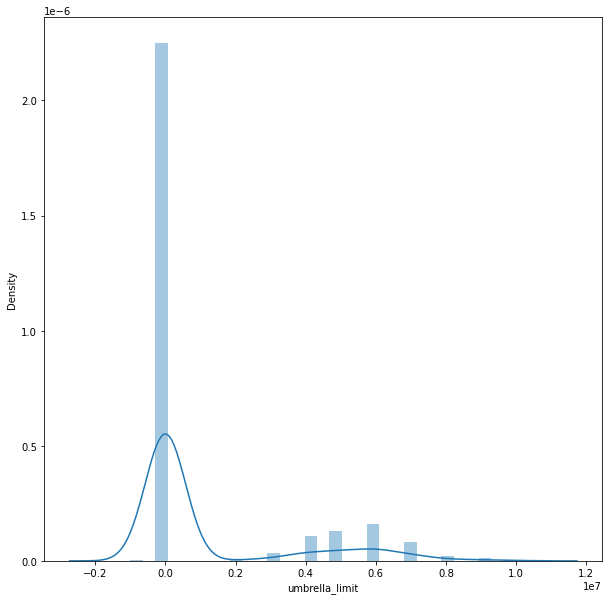

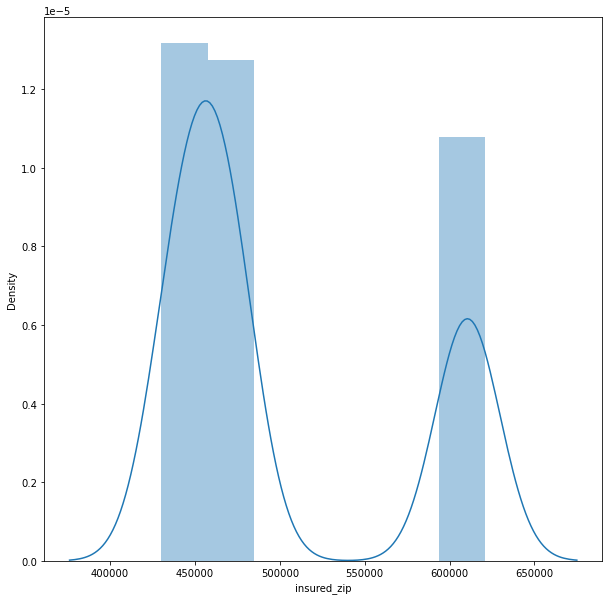

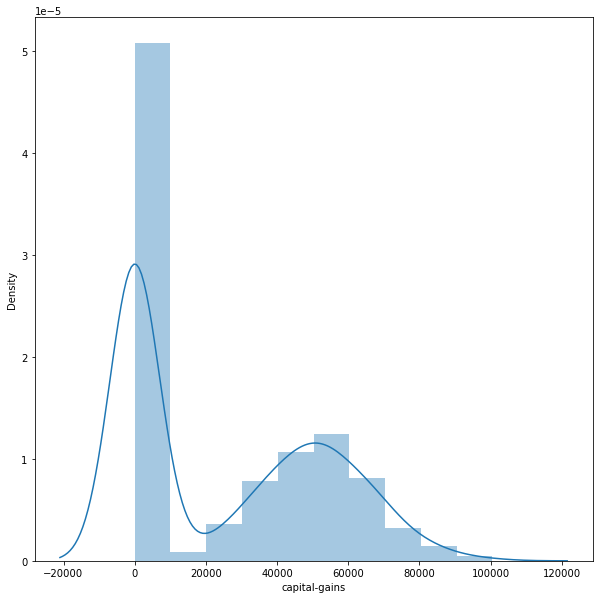

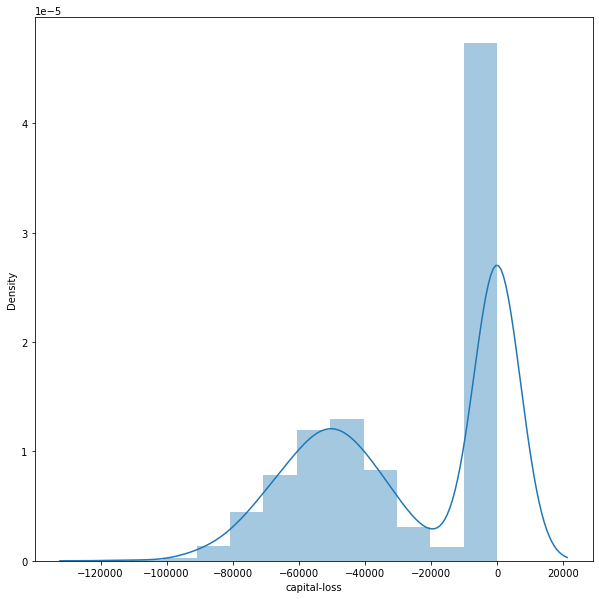

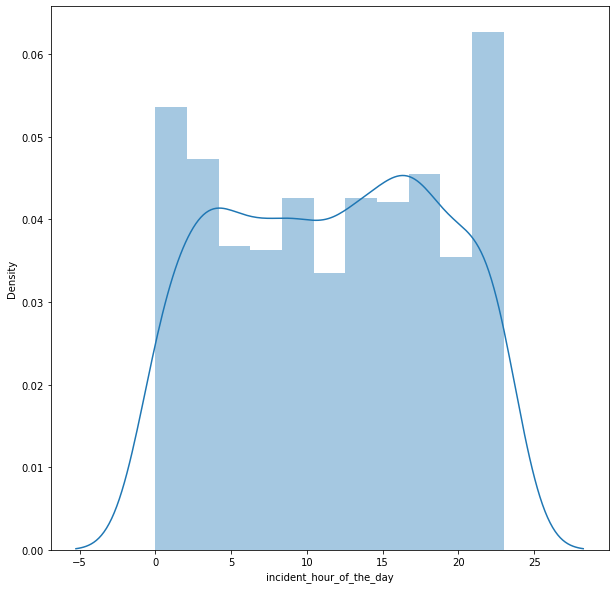

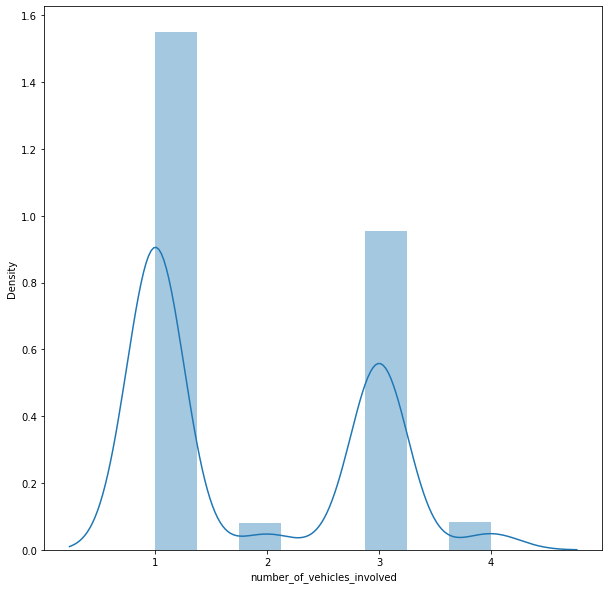

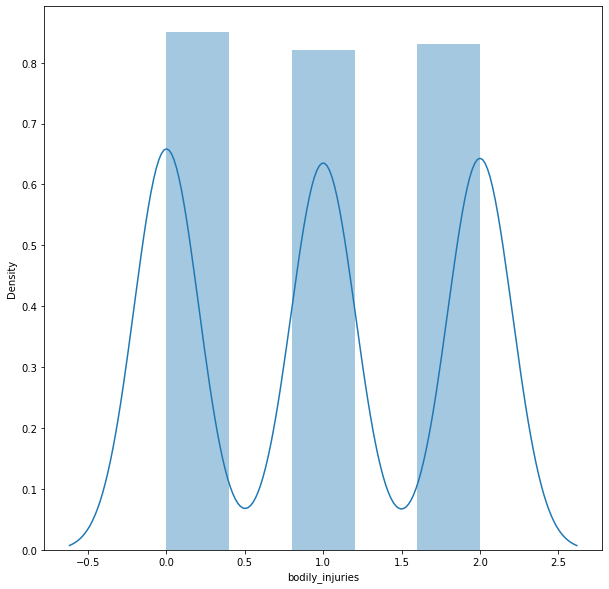

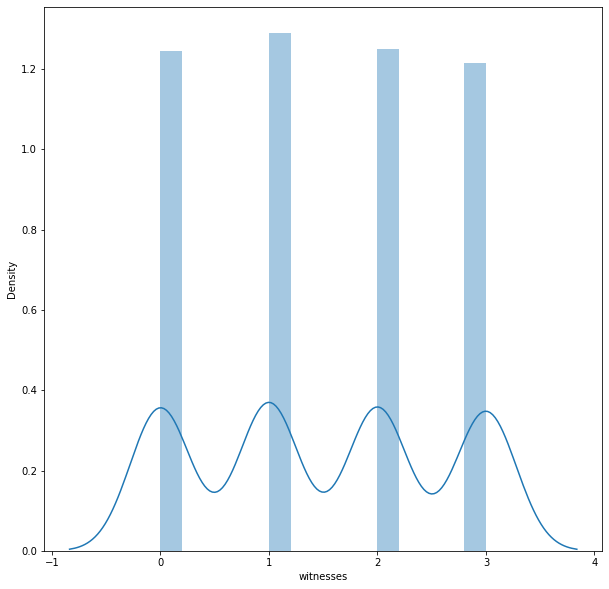

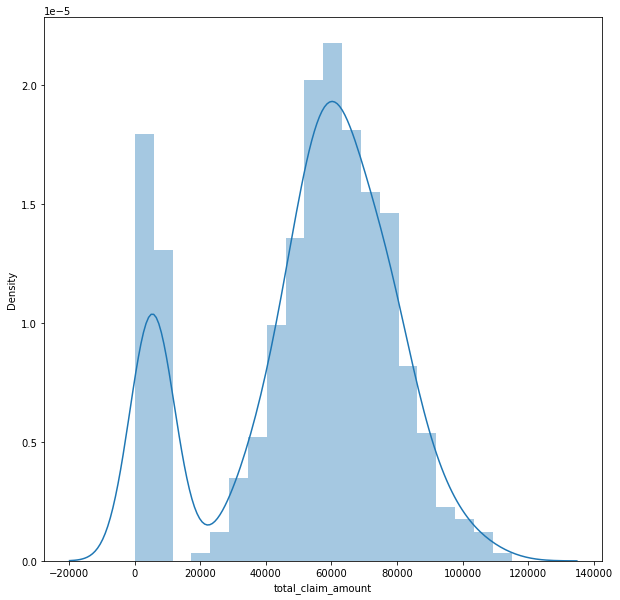

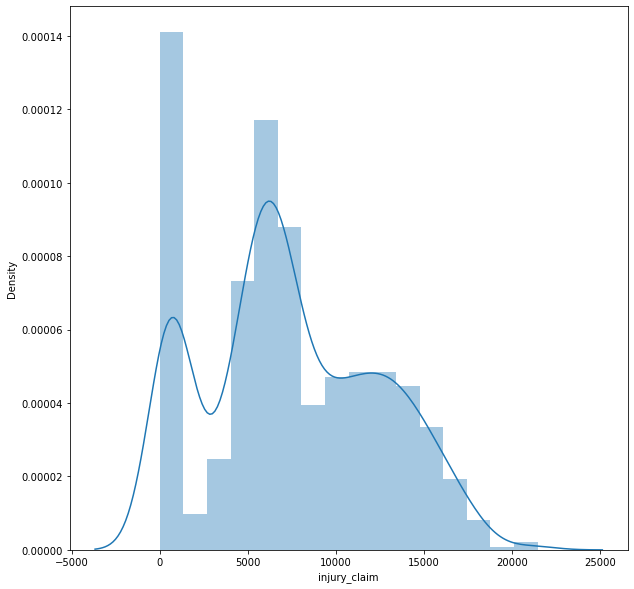

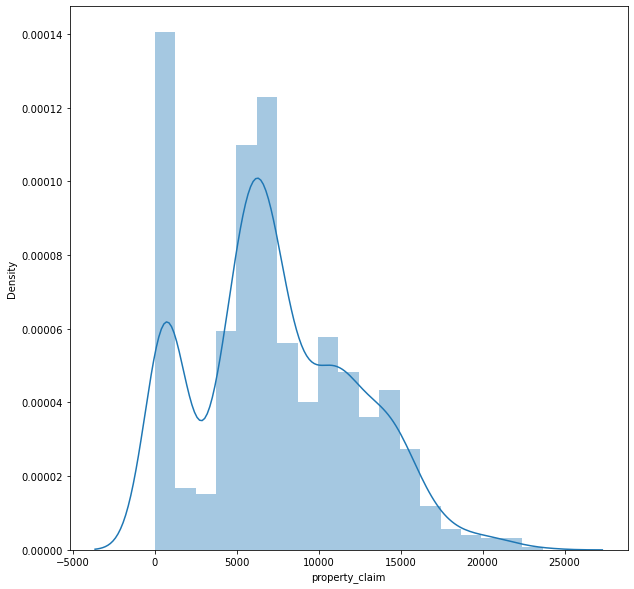

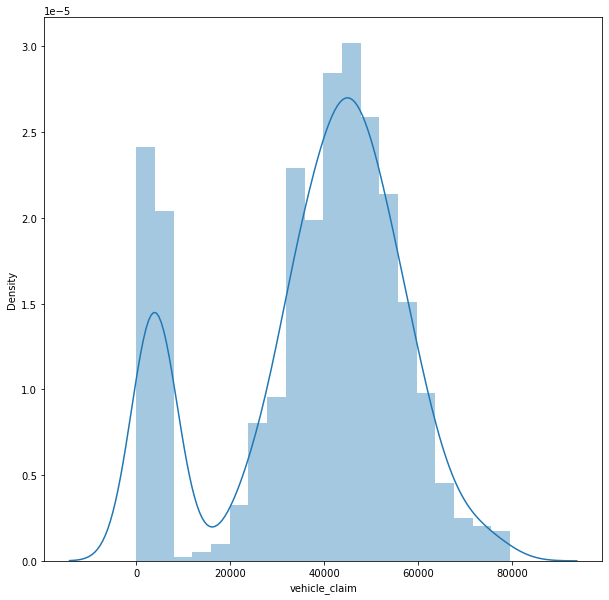

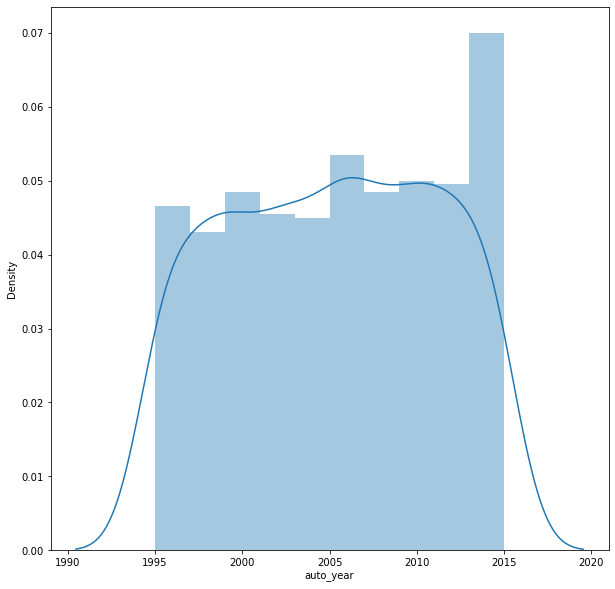

In [60]:
for i in fraud.columns:
    if fraud[i].dtypes!='object':
        plt.figure(figsize=(10,10))
        sns.distplot(fraud[i])

# Label Encoding:-

In [61]:
fraud.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [62]:
from sklearn.preprocessing import LabelEncoder

# Importing the Label Encoder from Sklearn Library

In [63]:
le=LabelEncoder()

In [64]:
for i in fraud.columns:
    if fraud[i].dtypes=="object":
        fraud[i]=le.fit_transform(fraud[i].values.reshape(-1,1))
        
# Running a for loop to give numeric values to strings using the Label Encoder in fraud dataset

In [65]:
fraud

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,0,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,3,1,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,1,1,46980,5220,5220,36540,1,5,1998,0


# Checking Correlation:-

In [66]:
fraud_corr=fraud.corr()
fraud_corr

# Showing the Correlation between all the independent variable and target variable

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.055055,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,...,0.058383,-0.022146,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.056538,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,...,0.052359,-0.020441,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,0.045713,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,...,-0.012661,0.031190,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443
policy_bind_date,0.055055,0.056538,0.045713,1.000000,0.015289,0.008486,-0.001721,-0.037733,-0.024866,-0.042749,...,-0.007004,-0.011563,0.015901,0.024160,0.008611,0.013784,-0.025955,0.000306,0.035067,0.060642
policy_state,-0.000328,-0.014533,0.072815,0.015289,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,...,0.022960,0.069017,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.038917,0.008486,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,...,0.071500,-0.001645,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,-0.006738,-0.001721,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,...,0.066639,0.038036,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.037733,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,...,0.002332,0.021998,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,-0.024866,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,...,-0.006738,-0.044771,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,-0.042749,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,...,0.019805,0.009841,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368


<AxesSubplot:>

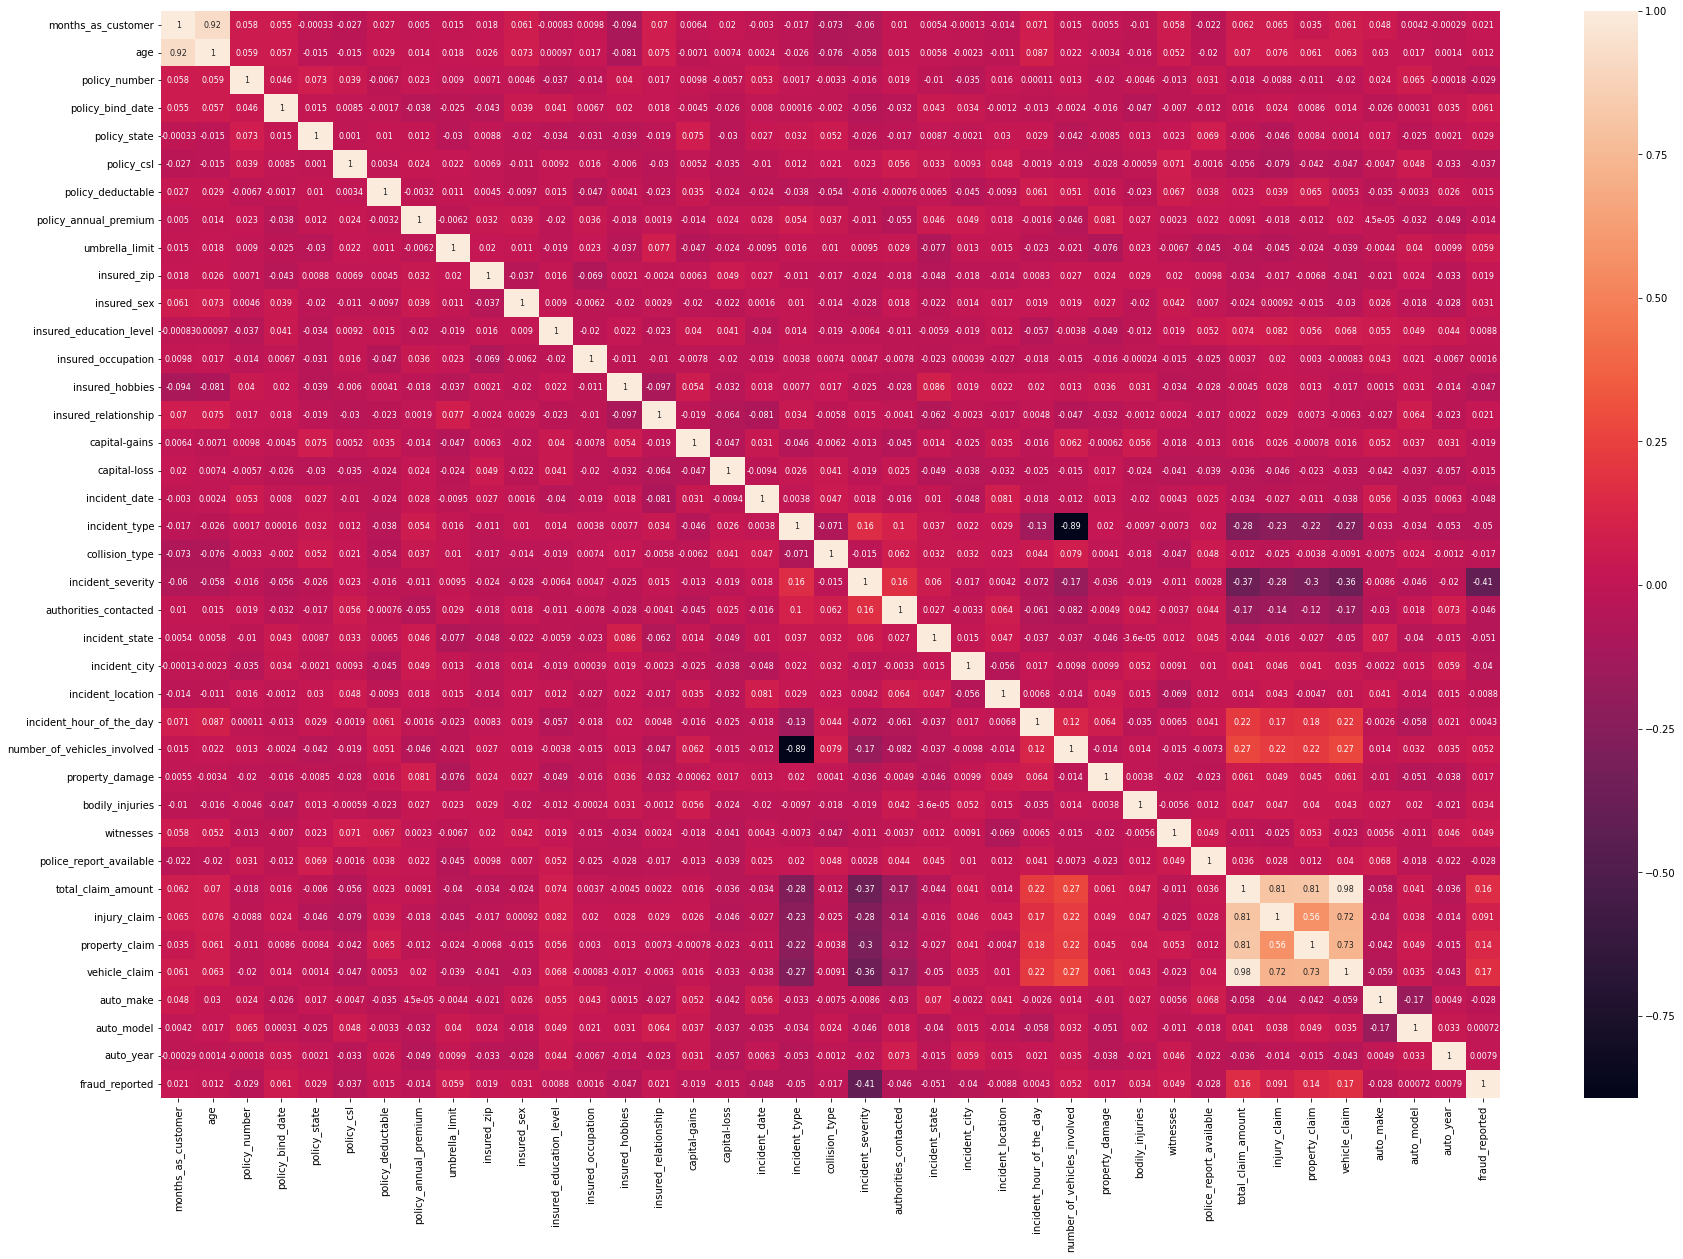

In [67]:
plt.figure(figsize=(30,20))
sns.heatmap(fraud_corr,annot=True,annot_kws={'size':8})

# Graphical Representation showing the Correlation between all the independent variable and target variable

In [68]:
corr=fraud.corr()
corr['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
policy_bind_date               0.060642
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
property_damage                0.017202
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
incident_location             -0.008832
policy_annual_premium         -0.014480


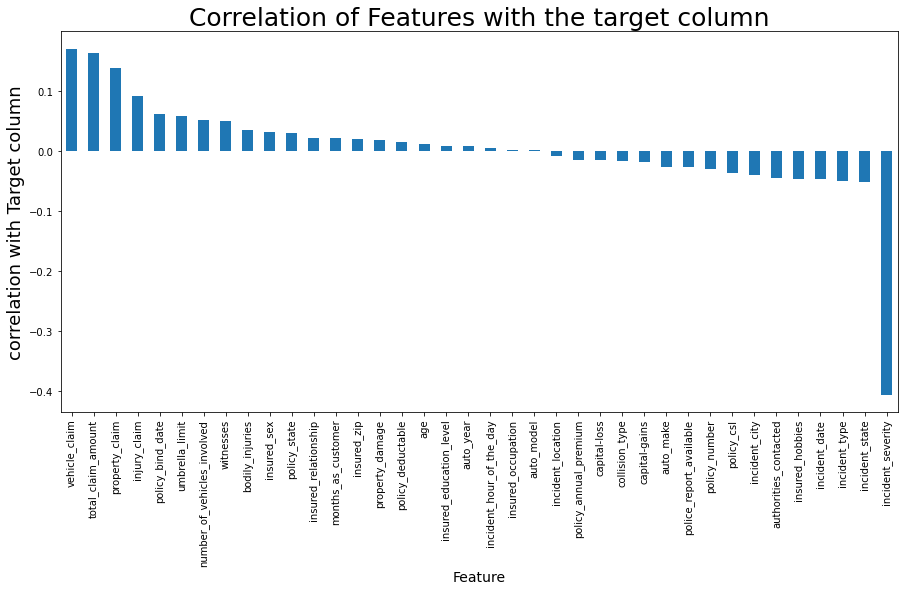

In [69]:
plt.figure(figsize=(15,7))
fraud.corr()["fraud_reported"].sort_values(ascending=False).drop(["fraud_reported"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Features with the target column", fontsize=25)
plt.show()

In [70]:
fraud.drop(columns=["injury_claim","property_claim","vehicle_claim"],inplace=True)
fraud

# Dropping these 3 Columns as total_claim_amount is the sum of all 3 columns

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,1,1,1,2,1,71610,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,1,0,0,0,0,5070,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,0,2,3,0,34650,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,1,0,1,2,0,63400,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,0,0,1,0,6500,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,1,1,0,1,0,87200,6,6,2006,0
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,1,1,2,3,0,108480,13,28,2015,0
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,3,0,2,3,1,67500,11,19,1996,0
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,1,0,0,1,1,46980,1,5,1998,0


In [71]:
fraud['incident_day'] = pd.DatetimeIndex(fraud['incident_date']).day
fraud['incident_month'] = pd.DatetimeIndex(fraud['incident_date']).month

# Extracting Day & Month from the Incident Date

In [72]:
fraud['incident_day']

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: incident_day, Length: 1000, dtype: int64

In [73]:
fraud

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,fraud_reported,incident_day,incident_month
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,1,2,1,71610,10,1,2004,1,1,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,0,5070,8,12,2007,1,1,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,2,3,0,34650,4,30,2007,0,1,1
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,1,2,0,63400,3,34,2014,1,1,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,0,1,0,6500,0,31,2009,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,0,1,0,87200,6,6,2006,0,1,1
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,2,3,0,108480,13,28,2015,0,1,1
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,2,3,1,67500,11,19,1996,0,1,1
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,0,1,1,46980,1,5,1998,0,1,1


In [74]:
fraud.drop(columns=["policy_bind_date","policy_number","incident_date","incident_location"],inplace=True)

# Dropping the columns as they dont have realtionship with target variable

In [75]:
fraud

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,fraud_reported,incident_day,incident_month
0,328,48,2,1,1000,1406.91,0,466132,1,4,...,1,2,1,71610,10,1,2004,1,1,1
1,228,42,1,1,2000,1197.22,5000000,468176,1,4,...,0,0,0,5070,8,12,2007,1,1,1
2,134,29,2,0,2000,1413.14,5000000,430632,0,6,...,2,3,0,34650,4,30,2007,0,1,1
3,256,41,0,1,2000,1415.74,6000000,608117,0,6,...,1,2,0,63400,3,34,2014,1,1,1
4,228,44,0,2,1000,1583.91,6000000,610706,1,0,...,0,1,0,6500,0,31,2009,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,431289,0,5,...,0,1,0,87200,6,6,2006,0,1,1
996,285,41,0,0,1000,1436.79,0,608177,0,6,...,2,3,0,108480,13,28,2015,0,1,1
997,130,34,2,1,500,1383.49,3000000,442797,0,5,...,2,3,1,67500,11,19,1996,0,1,1
998,458,62,0,2,2000,1356.92,5000000,441714,1,0,...,0,1,1,46980,1,5,1998,0,1,1


# Spliting Dataset into x and y

In [76]:
x=fraud.drop(columns=["fraud_reported"])
x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,incident_day,incident_month
0,328,48,2,1,1000,1406.91,0,466132,1,4,...,1,1,2,1,71610,10,1,2004,1,1
1,228,42,1,1,2000,1197.22,5000000,468176,1,4,...,0,0,0,0,5070,8,12,2007,1,1
2,134,29,2,0,2000,1413.14,5000000,430632,0,6,...,0,2,3,0,34650,4,30,2007,1,1
3,256,41,0,1,2000,1415.74,6000000,608117,0,6,...,0,1,2,0,63400,3,34,2014,1,1
4,228,44,0,2,1000,1583.91,6000000,610706,1,0,...,0,0,1,0,6500,0,31,2009,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,431289,0,5,...,1,0,1,0,87200,6,6,2006,1,1
996,285,41,0,0,1000,1436.79,0,608177,0,6,...,1,2,3,0,108480,13,28,2015,1,1
997,130,34,2,1,500,1383.49,3000000,442797,0,5,...,0,2,3,1,67500,11,19,1996,1,1
998,458,62,0,2,2000,1356.92,5000000,441714,1,0,...,0,0,1,1,46980,1,5,1998,1,1


In [77]:
y=fraud.fraud_reported
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

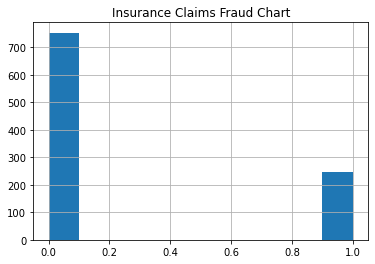

In [78]:
fraud["fraud_reported"].hist(grid=True)
plt.title("Insurance Claims Fraud Chart")
plt.show()

# As we can clearly see that there is a class imbalance problem in the target variable ["fraud_reported"]

In [79]:
from imblearn.over_sampling import SMOTE

# Importing SMOTE function to treat the class imbalance problem with Over Sampling Method

In [80]:

sm=SMOTE()

In [81]:
x_over, y_over = sm.fit_resample(x,y)

# Resampling the x and y to make the class balanced and saving the new x and y in x_over and y_over respectively

In [82]:
y_over.value_counts()

# Now we can see that both the classes are balanced without losing any data

1    753
0    753
Name: fraud_reported, dtype: int64

In [83]:
# Check data is balnce or not
from collections import Counter
print('Original Dataset shape{}'.format(Counter(y)))
print("Resampled datset shape{}".format(Counter(y_over)))

Original Dataset shapeCounter({0: 753, 1: 247})
Resampled datset shapeCounter({1: 753, 0: 753})


# Feature Scaling:

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(x_over)

In [85]:
X

array([[ 1.13171054,  1.06327112,  1.34615056, ..., -0.14426483,
         0.        ,  0.        ],
       [ 0.21131261,  0.37137152,  0.09857964, ...,  0.37385004,
         0.        ,  0.        ],
       [-0.65386145, -1.12774427,  1.34615056, ...,  0.37385004,
         0.        ,  0.        ],
       ...,
       [ 0.16529271, -0.32052808, -1.14899127, ..., -1.52590451,
         0.        ,  0.        ],
       [ 0.6162877 ,  0.48668812,  0.09857964, ..., -1.35319955,
         0.        ,  0.        ],
       [ 0.036437  ,  0.25605492,  1.34615056, ...,  1.06466988,
         0.        ,  0.        ]])

# Splitting Data into training and testing set:

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_over, test_size = 0.2, random_state = 0)

# Model building after balancing the data

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

# Logistic Regression

In [88]:
lr= LogisticRegression()

lr.fit(X_train, y_train)
print("Logistic regression successfully implemented")

y_pred =  lr.predict(X_test)

# confussion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,y_pred)

print("Confusion Matrix:- ")
print(cm)

lr_accuracy = accuracy_score(y_test,y_pred)

print("accuracy is:- ", lr_accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Logistic regression successfully implemented
Confusion Matrix:- 
[[115  39]
 [ 33 115]]
accuracy is:-  76.15894039735099
Classification Report:-
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       154
           1       0.75      0.78      0.76       148

    accuracy                           0.76       302
   macro avg       0.76      0.76      0.76       302
weighted avg       0.76      0.76      0.76       302



# Decision tree

In [89]:
dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)
print("Decision Tree Algorithm is successfully implimented.")

y_pred = dtree.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
dtree_accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", dtree_accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Decision Tree Algorithm is successfully implimented.
Confusion Matrix:- 
[[120  34]
 [ 32 116]]
accuracy:-  78.1456953642384
Classification Report:-
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       154
           1       0.77      0.78      0.78       148

    accuracy                           0.78       302
   macro avg       0.78      0.78      0.78       302
weighted avg       0.78      0.78      0.78       302



# Random Forest Classifier

In [90]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
print("Rndom Forest Classifier successfully Implimented")

y_pred = rfc.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
rfc_accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", rfc_accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Rndom Forest Classifier successfully Implimented
Confusion Matrix:- 
[[131  23]
 [ 24 124]]
accuracy:-  84.43708609271523
Classification Report:-
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       154
           1       0.84      0.84      0.84       148

    accuracy                           0.84       302
   macro avg       0.84      0.84      0.84       302
weighted avg       0.84      0.84      0.84       302



# K Nearest Neighbors Classifier

In [91]:
knn = KNeighborsClassifier(n_neighbors= 7)
knn.fit(X_train, y_train)

print("K-Nearest Neighbors classifier is successfully implemented")

y_pred = knn.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
knn_accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", knn_accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

K-Nearest Neighbors classifier is successfully implemented
Confusion Matrix:- 
[[ 65  89]
 [  8 140]]
accuracy:-  67.88079470198676
Classification Report:-
              precision    recall  f1-score   support

           0       0.89      0.42      0.57       154
           1       0.61      0.95      0.74       148

    accuracy                           0.68       302
   macro avg       0.75      0.68      0.66       302
weighted avg       0.75      0.68      0.66       302



# Ada Boost Classifier

In [92]:
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)

print("Ada Boost Classifier is successfully implemented")

y_pred = adb.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
adb_accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", adb_accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Ada Boost Classifier is successfully implemented
Confusion Matrix:- 
[[128  26]
 [ 28 120]]
accuracy:-  82.11920529801324
Classification Report:-
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       154
           1       0.82      0.81      0.82       148

    accuracy                           0.82       302
   macro avg       0.82      0.82      0.82       302
weighted avg       0.82      0.82      0.82       302



# Naive Bayes

In [93]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("Naive Bayes is successfully implemented")

y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
print("Confusion Matrix:- ")
print(cm)

# Accuracy test
gnb_accuracy = accuracy_score(y_test, y_pred)
print("accuracy:- ", gnb_accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Naive Bayes is successfully implemented
Confusion Matrix:- 
[[112  37]
 [ 42 111]]
accuracy:-  73.84105960264901
Classification Report:-
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       154
           1       0.73      0.75      0.74       148

    accuracy                           0.74       302
   macro avg       0.74      0.74      0.74       302
weighted avg       0.74      0.74      0.74       302



# XG Boost Classifier

In [94]:
from xgboost import XGBClassifier                                                                                                           
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
print("XG Boost Classifier is successfully implemented")

y_pred = xgb.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
print("Confusion Matrix:- ")
print(cm)

# Accuracy test
xgb_accuracy = accuracy_score(y_test, y_pred)
print("accuracy:- ", xgb_accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

XG Boost Classifier is successfully implemented
Confusion Matrix:- 
[[132  22]
 [ 22 126]]
accuracy:-  85.43046357615894
Classification Report:-
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       154
           1       0.85      0.85      0.85       148

    accuracy                           0.85       302
   macro avg       0.85      0.85      0.85       302
weighted avg       0.85      0.85      0.85       302



In [95]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN Classifier', 'Ada Boost Classifier', 'Naive Bayes','XG Boost Classifier'],
    'Accuracy Score': [lr_accuracy, dtree_accuracy, rfc_accuracy,knn_accuracy, adb_accuracy, gnb_accuracy, xgb_accuracy]})

In [96]:
models.sort_values(['Accuracy Score'], ascending=[False])

,Model,Accuracy Score
6,XG Boost Classifier,0.854305
2,Random Forest,0.844371
4,Ada Boost Classifier,0.821192
1,Decision Tree,0.781457
0,Logistic Regression,0.761589
5,Naive Bayes,0.738411
3,KNN Classifier,0.678808


# Cross Validation :-

In [97]:
from sklearn.model_selection import cross_val_score

# Importing the Cross Validation Score from Sklearn Library

In [98]:
scr1=cross_val_score(lr, X, y_over, cv=5)
scr1

array([0.64569536, 0.74418605, 0.85714286, 0.86046512, 0.85714286])

In [99]:
print("The Cross Validation Score of Logistic Regression is :", scr1.mean())

The Cross Validation Score of Logistic Regression is : 0.7929264482629645


In [100]:
scr2=cross_val_score(dtree,X, y_over, cv=5)
scr2

array([0.7218543 , 0.7807309 , 0.82724252, 0.82392027, 0.82724252])

In [101]:
print("The Cross Validation Score of Decision Tree Classifier is :", scr2.mean())

The Cross Validation Score of Decision Tree Classifier is : 0.7961981034520693


In [102]:
scr3=cross_val_score(rfc,X, y_over, cv=5)
scr3

array([0.7218543 , 0.81395349, 0.91694352, 0.90697674, 0.9269103 ])

In [103]:
print("The Cross Validation Score of Random Forest Classifier is :", scr3.mean())

The Cross Validation Score of Random Forest Classifier is : 0.8573276715583814


In [104]:
scr4=cross_val_score(knn,X, y_over, cv=5)
scr4

array([0.62251656, 0.67774086, 0.71760797, 0.73089701, 0.72425249])

In [105]:
print("The Cross Validation Score of K Neighbors Classifier is :", scr4.mean())

The Cross Validation Score of K Neighbors Classifier is : 0.6946029790323645


In [106]:
scr5=cross_val_score(adb,X, y_over, cv=5)
scr5

array([0.66887417, 0.75747508, 0.88372093, 0.91362126, 0.92026578])

In [107]:
print("Cross Validation Score of Adaboost Classifier Model is", scr5.mean())

Cross Validation Score of Adaboost Classifier Model is 0.8287914457327672


In [108]:
scr6=cross_val_score(gnb, X, y_over, cv=5)
scr6

array([0.58609272, 0.74086379, 0.83388704, 0.87043189, 0.84053156])

In [109]:
print("Cross Validation Score of Naive Bayes Model is", scr6.mean())

Cross Validation Score of Naive Bayes Model is 0.7743614001892147


In [111]:
scr7=cross_val_score(xgb, X, y_over, cv=5)
scr7

array([0.75165563, 0.83388704, 0.93355482, 0.93687708, 0.95016611])

In [112]:
print("Cross Validation Score of XG Boost Classifier Model is", scr7.mean())

Cross Validation Score of XG Boost Classifier Model is 0.881228135794592


In [116]:
models_cv = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN Classifier', 'Ada Boost Classifier', 'Naive Bayes','XG Boost Classifier'],
    'Cross Validation Score': [scr1.mean(), scr2.mean(), scr3.mean(),scr4.mean(), scr5.mean(), scr6.mean(), scr7.mean()]})

In [117]:
models_cv.sort_values(['Cross Validation Score'], ascending=[False])

,Model,Cross Validation Score
6,XG Boost Classifier,0.881228
2,Random Forest,0.857328
4,Ada Boost Classifier,0.828791
1,Decision Tree,0.796198
0,Logistic Regression,0.792926
5,Naive Bayes,0.774361
3,KNN Classifier,0.694603


<Figure size 720x504 with 0 Axes>

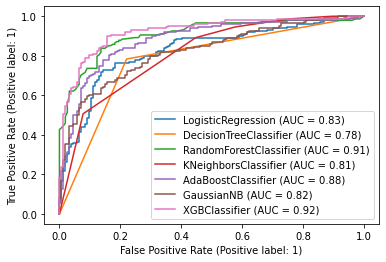

In [118]:
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(10,7))
fig = plot_roc_curve(lr, X_test, y_test)
fig = plot_roc_curve(dtree, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(rfc, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(knn, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(adb, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(gnb, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(xgb, X_test, y_test, ax = fig.ax_)

plt.show()

# Hyper Parameter Tuning:-

In [119]:
from sklearn.model_selection import GridSearchCV

# Importing Grid Search CV to perform Hyper Parameter Tuning

In [121]:
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]}

In [123]:
GCV=GridSearchCV(XGBClassifier(),params,cv=5)

In [124]:
GCV.fit(X_train,y_train)

# Training the GridSearchCV model

[10:51:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma" } are not used.

[10:51:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma" } are not used.

[10:51:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma" } are not used.

[10:51:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma" } are not used.

[10:51:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma" } are not used.

[10:51:51] WARNING: C:\bu

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                         

In [125]:
GCV.best_params_

{'base_score': 0.2,
 'booster': 'gbtree',
 'gamma': 0,
 'learning_rate': 0.05,
 'n_estimators': 500,
 'reg_alpha': 0,
 'reg_lambda': 0.5}

In [126]:
final_model=XGBClassifier(base_score=0.2, booster='gbtree', gamma=0, learning_rate=0.05,n_estimators=500,reg_alpha=0,reg_lambda=0.5)
final_model.fit(X_train,y_train)
final_model_pred=final_model.predict(X_test)
acc=accuracy_score(y_test,final_model_pred)
print(acc*100)

86.09271523178808


# Saving the XGBClassifier Model (Serialization):-

In [127]:
import pickle
file='Insurance Claim Fraud Detection'
pickle.dump(xgb,open(file,'wb'))

In [128]:
load=pickle.load(open('Insurance Claim Fraud Detection','rb'))
result=load.score(X_test,y_test)
print(result*100)

85.43046357615894


# conclusion

In [129]:
conclusion=pd.DataFrame([load.predict(X_test),y_test],index=["Predicted","Original"])

In [130]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
Predicted,0,0,0,1,1,1,1,0,1,1,...,1,1,0,0,0,0,1,1,1,0
Original,0,0,0,1,1,1,0,0,1,1,...,1,1,0,1,1,0,0,1,1,0


# Model Created Successfully !